# Task 3

<i>Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.</i>

##  Importing the necessary libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

## Reading the dataset

In [4]:
df = pd.read_csv(r"bankfull.csv",delimiter=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Details about the dataset

In [6]:
df.shape

(45211, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Checking for null/missing values in the dataset

In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

`Observation & Inference:`
- No missing values present

## Checking for duplicate values in the dataset

In [11]:
df.duplicated().sum()

0

`Observation & Inference:`
- No duplicate values are found

## Visualizing numerical columns using histogram

In [12]:
df_obj= df.select_dtypes(include='object').columns
df_num= df.select_dtypes(exclude='object').columns

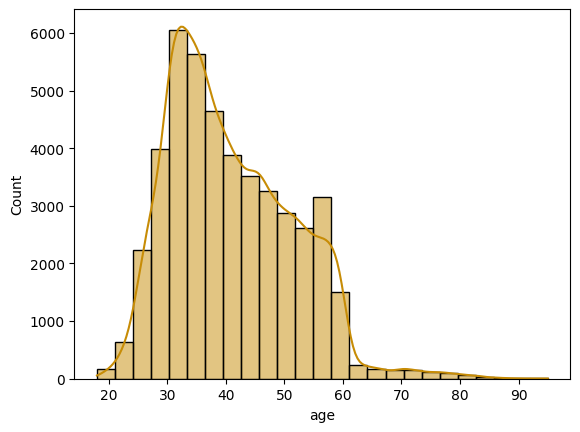

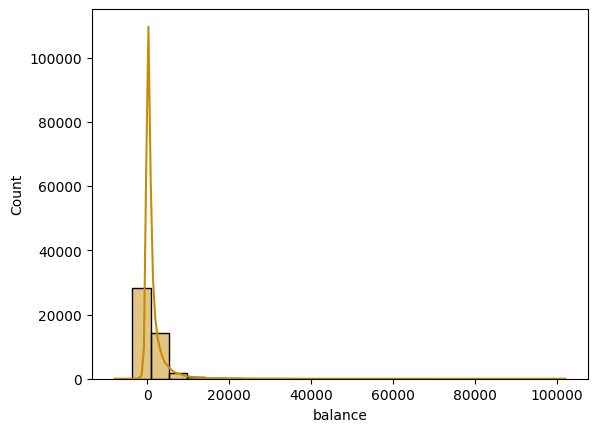

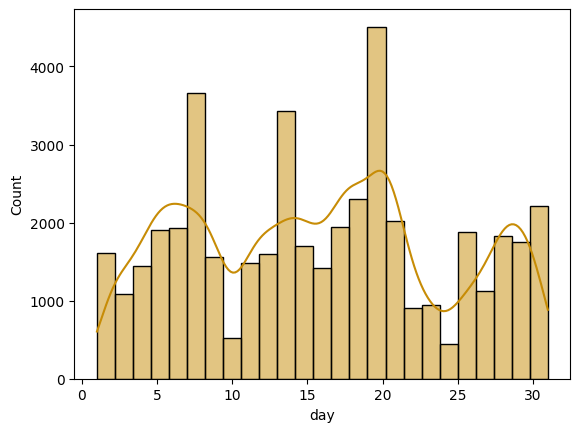

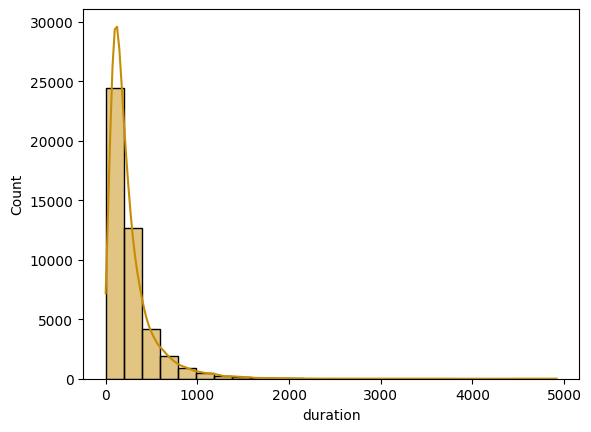

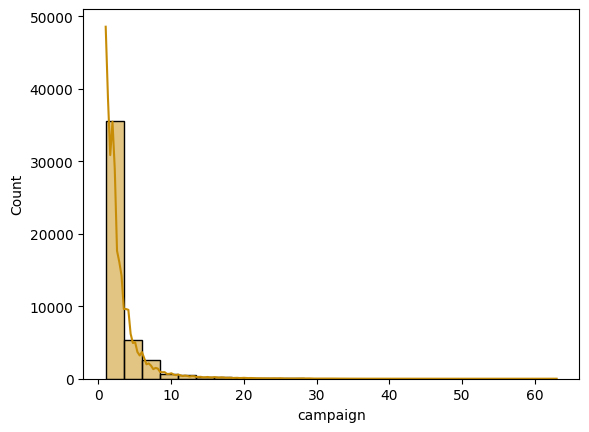

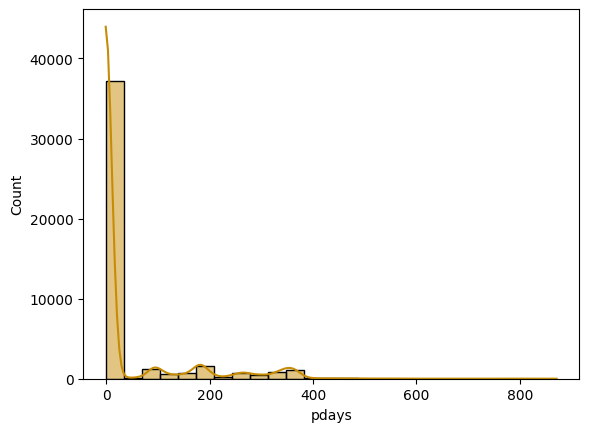

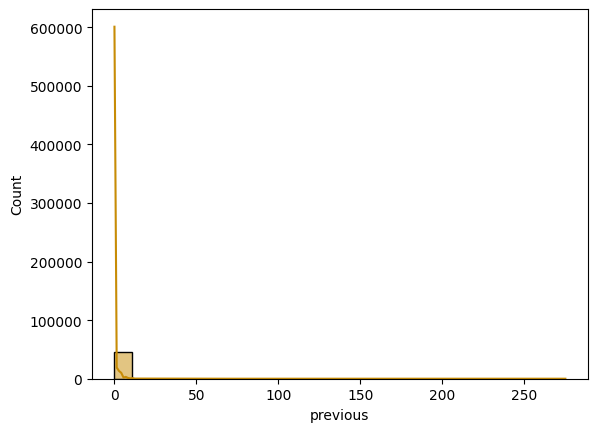

In [13]:
for feature in df_num:
    sns.histplot(x=feature,data=df,bins=25,kde=True,color='#c78c06')
    plt.show()

## Visualizing categorical columns using bar graphs


C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


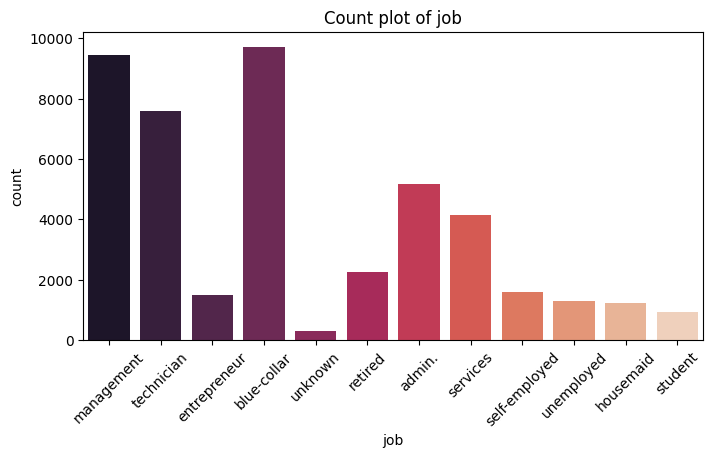

C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


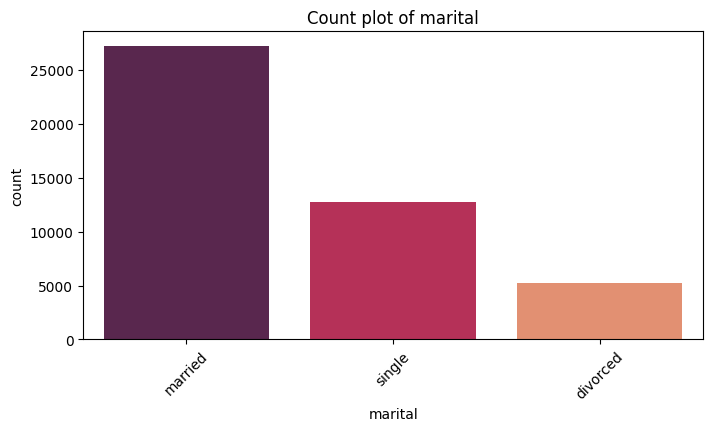

C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


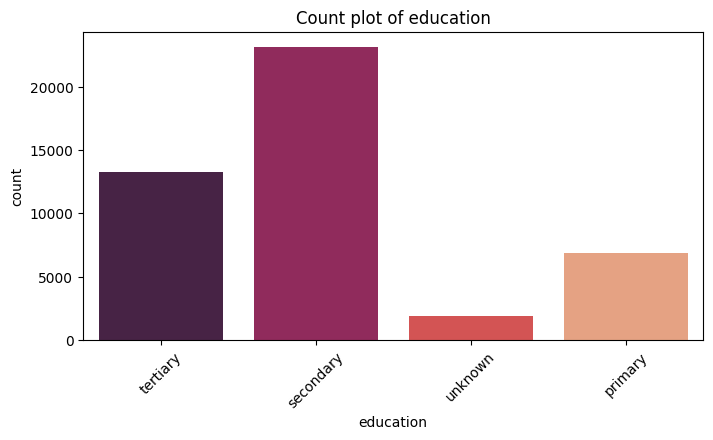

C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


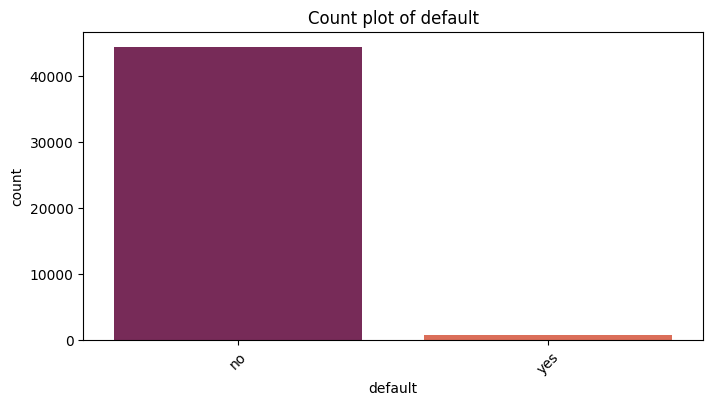

C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


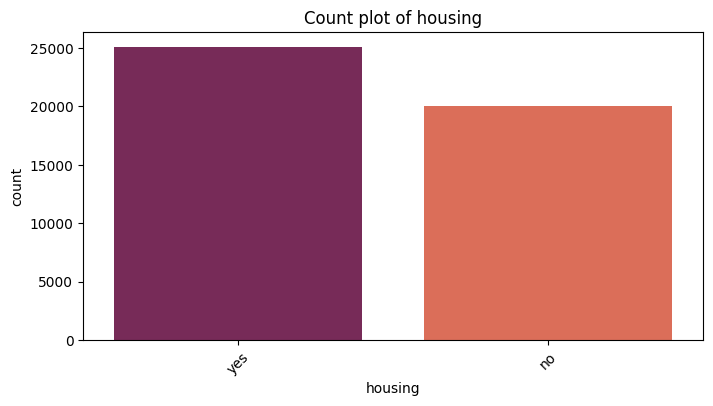

C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


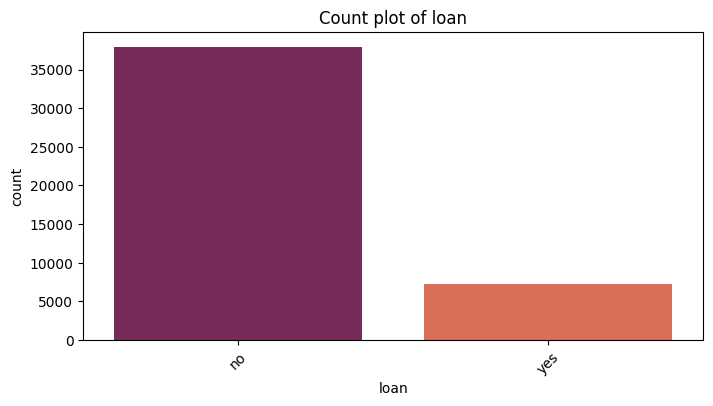

C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


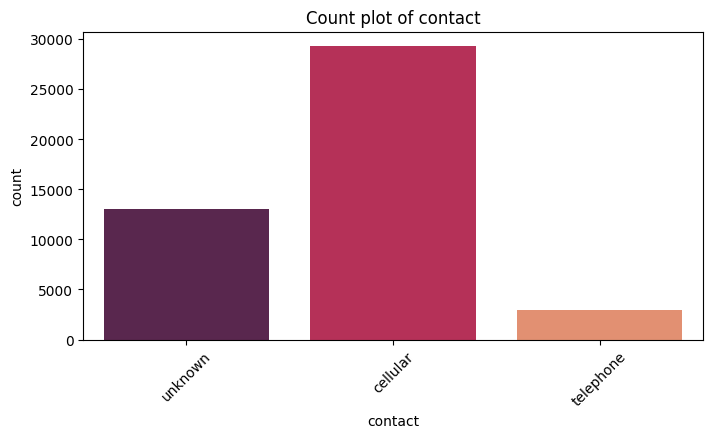

C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


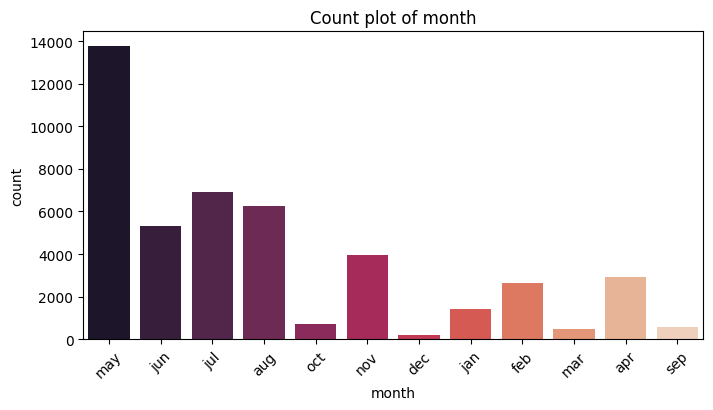

C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


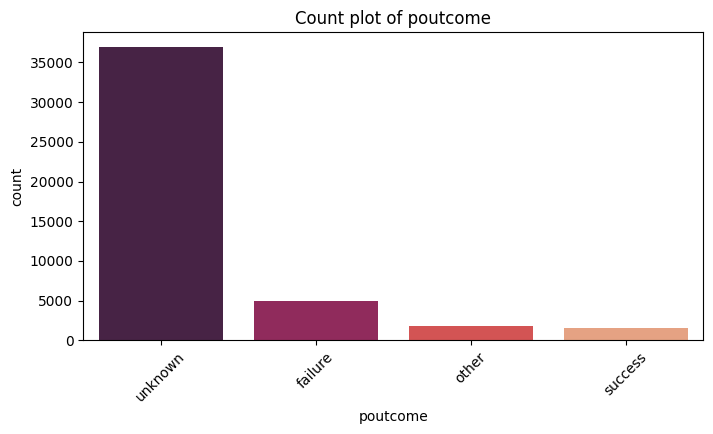

C:\Users\arkam\AppData\Local\Temp\ipykernel_5900\2110867917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature,data=df,palette='rocket')


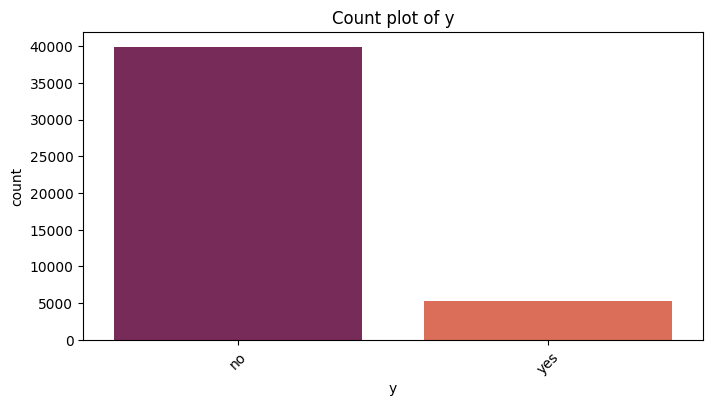

In [14]:
for feature in df_obj:
    plt.figure(figsize=(8,4))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=df,palette='rocket')
    plt.xticks(rotation=45)
    plt.show()

`Observations & Insights:`

- In the Job Column, most of the clients have 'blue-collar'as occupation.

- In the marital Column, most of the clients are married.

- In the education Column, most of the clients have had education till 'secondary' level.

- In the default Column, most of the clients have 'no' credit as default.

- In the housing Column, most of the clients are taking housing loan.

- In the loan Column, most of the clients are not taking personal loan.

- In the contact Column, most of the clients have chosen cellular as their contact.

- In the month Column, most of the clients are contacted in 'may'.

- In the day_of_week Column, most of the clients are contacted in 'thursday'.

- In the poutcome Column, the result of most of the previous market campaign is 'unknown'.

- In the target column , most of the clients are not subscribed a term deposit.

## Checking for outliers

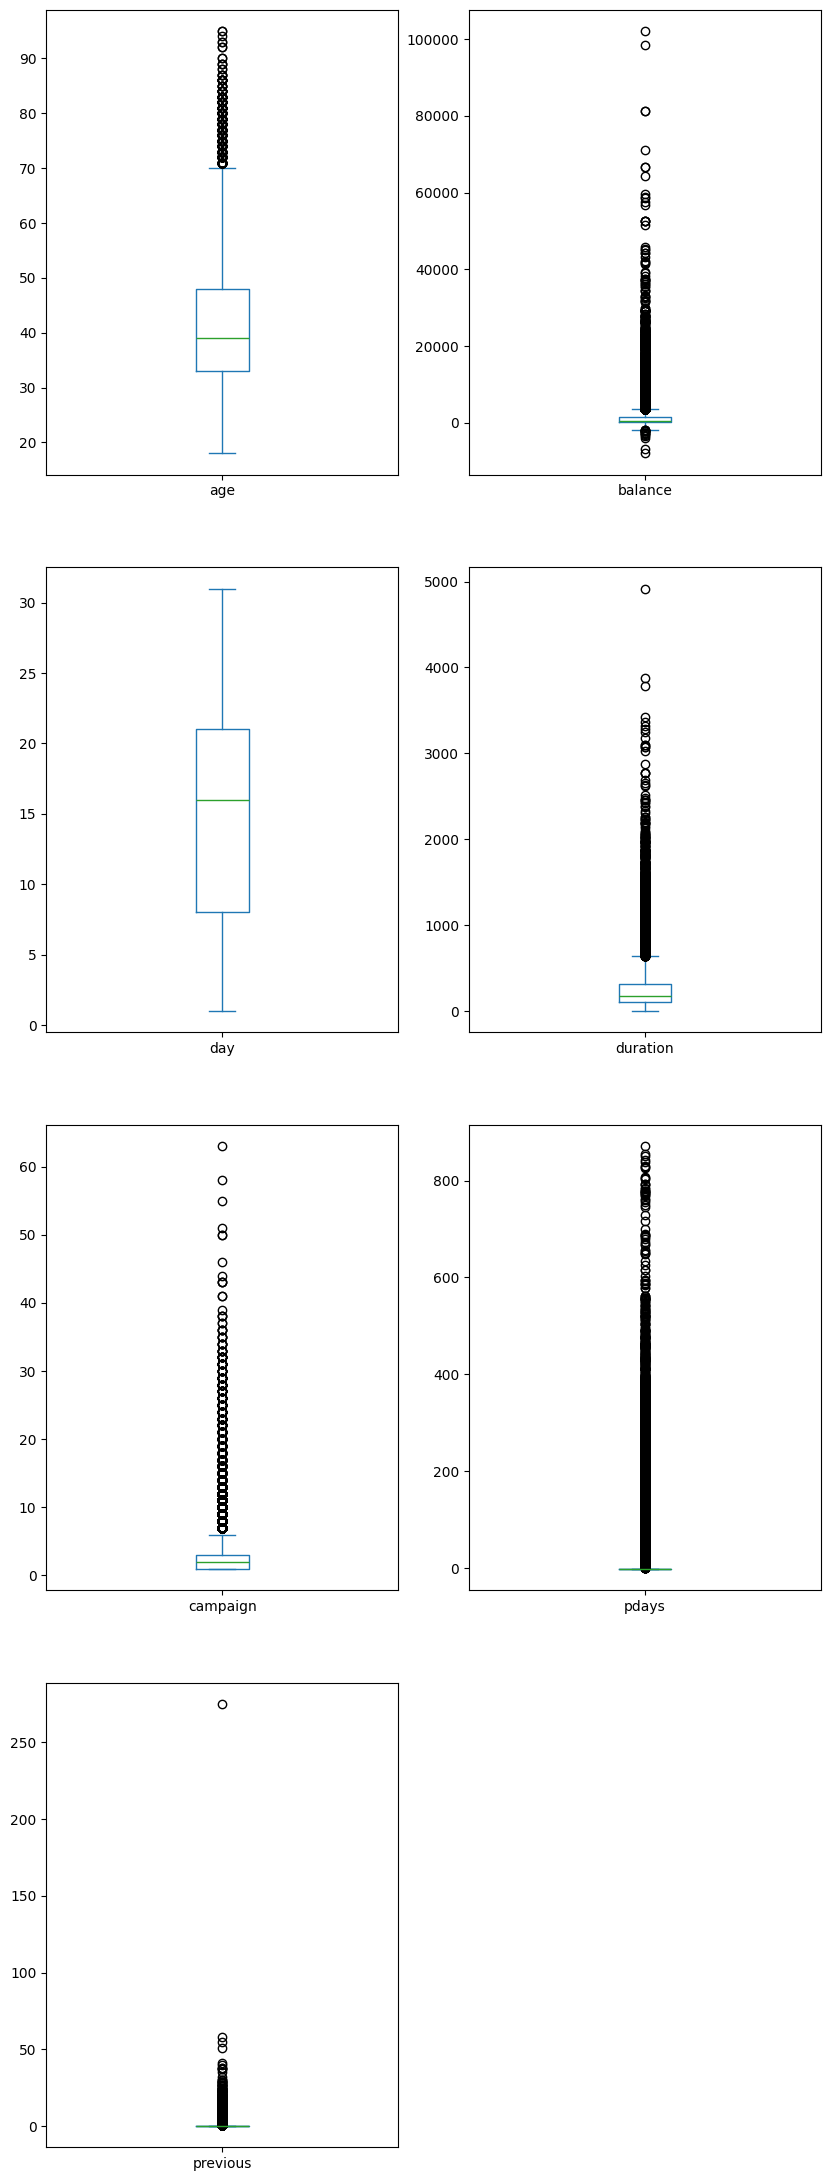

In [15]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,35))
plt.show()

## Treating the Outliers

In [16]:
# Defining a function to remove outliers using Z-score
def remove_outliers(df, columns):
    z_scores = np.abs(stats.zscore(df[columns]))
    filtered_entries = (z_scores < 3).all(axis=1)
    return df[filtered_entries]

# Removing outliers
data = remove_outliers(df, df_num)

# The shape of the dataset before and after removing outliers
df.shape, data.shape


((45211, 17), (40209, 17))

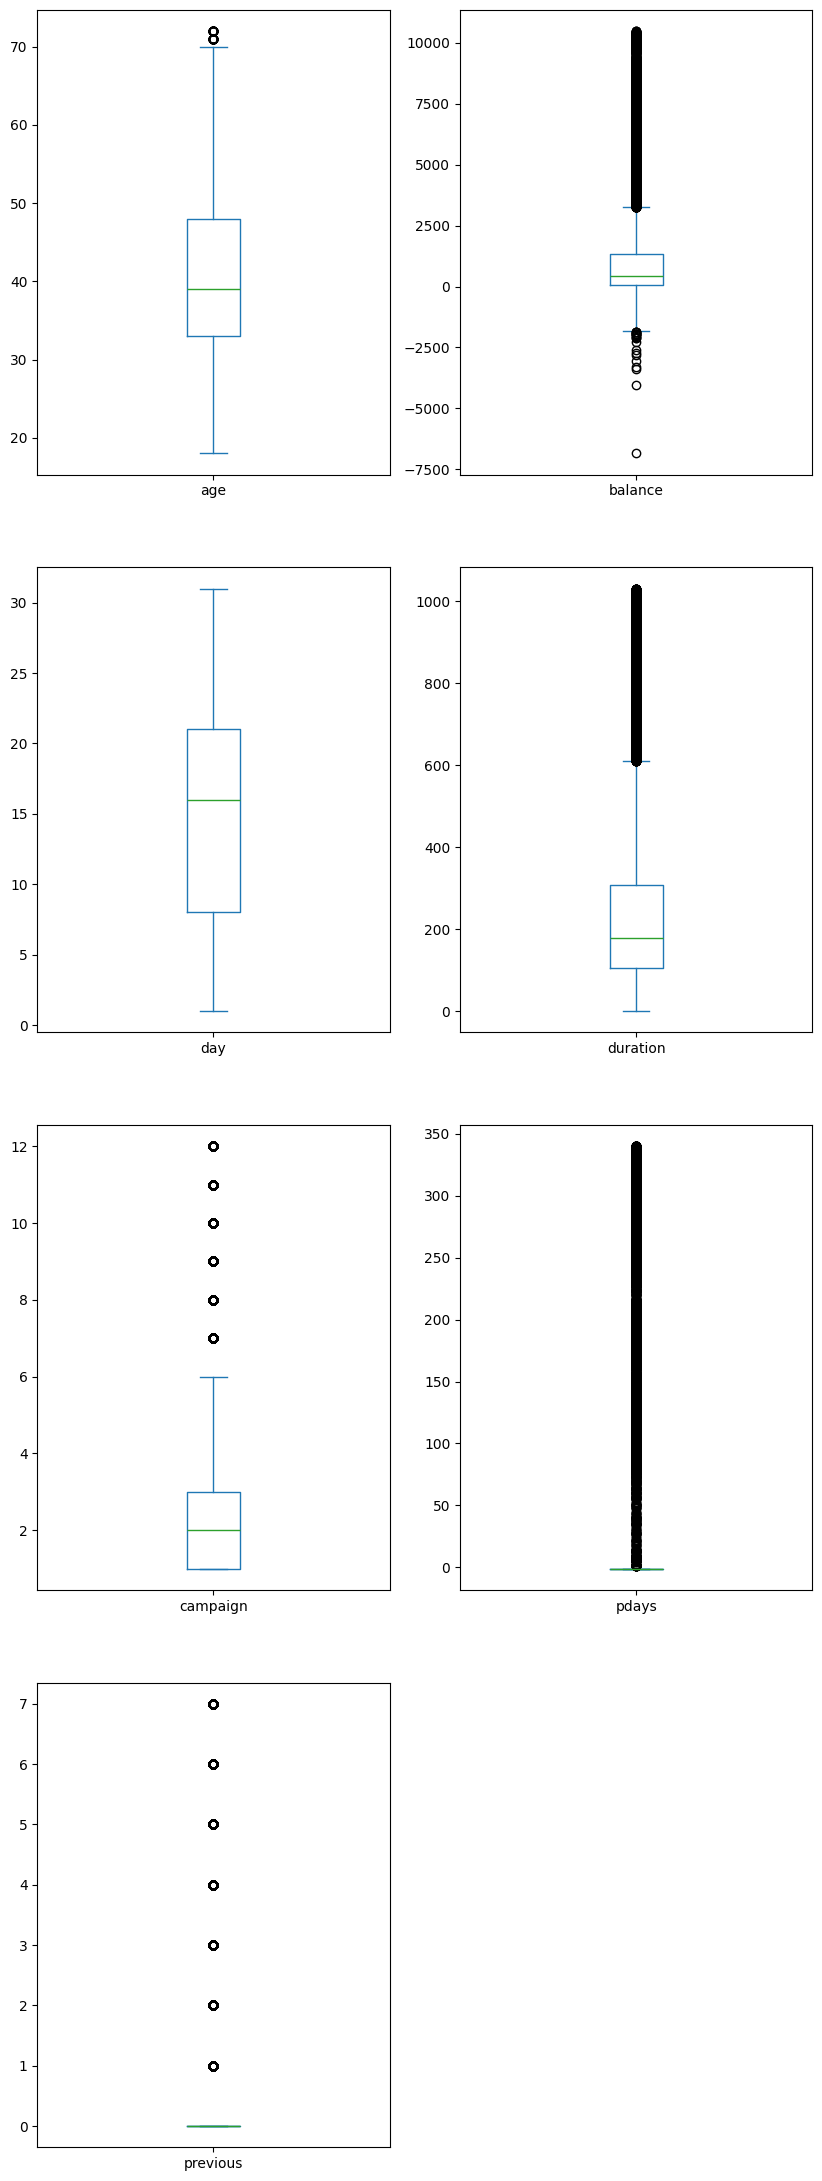

In [17]:
data.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,35))
plt.show()

## Checking for correlation using heatmap

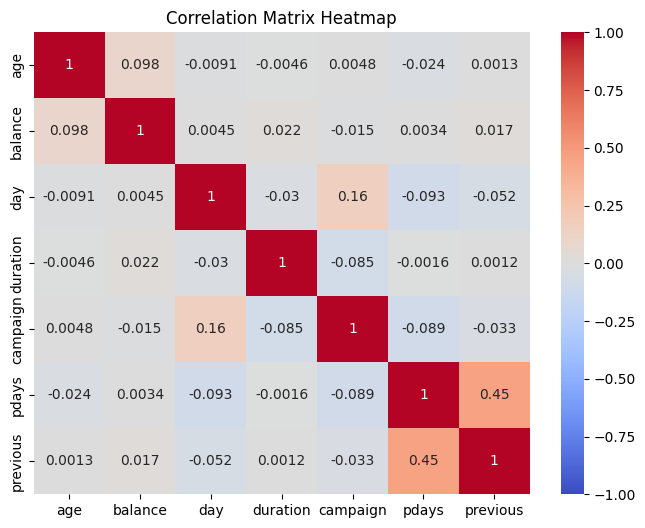

In [18]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# Finding highly correlated features
threshold = 0.8
highly_correlated = set()

for i in range(len(numerical_df.columns)):
    for j in range(i):
        if abs(numerical_df.iloc[i, j]) > threshold:
            colname = numerical_df.columns[i]
            highly_correlated.add(colname)

# Removing highly correlated features
data_reduced = data.drop(columns=highly_correlated)

# The shape of the dataset before and after removing highly correlated columns
data.shape, data_reduced.shape


((40209, 17), (40209, 11))

## Preprocess the Data

### Encoding categorical variables using one-hot encoding


In [24]:
# Encoding categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data_reduced, drop_first=True)

# Split the data into features and target variable
x = data_encoded.drop(columns=['y_yes'])
y = data_encoded['y_yes']



## Splitting the data into features (X) and target variable (y)

In [25]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The shapes of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((32167, 36), (8042, 36), (32167,), (8042,))

## Decision Tree classifier

### Initialising the Decision Tree classifier

In [26]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

## Evaluating Training and Testing Accuracy

### Making predictions on the test set

In [27]:
y_pred = dtc.predict(x_test)


### Evaluating the training and testing set

In [28]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#### Accuracy

In [32]:
print("Accuracy : ", accuracy)

Accuracy :  0.868689380751057


#### Confusion matrix

In [34]:
print("Confusion Matrix : \n", conf_matrix)

Confusion Matrix : 
 [[6768  447]
 [ 609  218]]


#### Classification report

In [36]:
print("Classification Report : \n", class_report)

Classification Report : 
               precision    recall  f1-score   support

       False       0.92      0.94      0.93      7215
        True       0.33      0.26      0.29       827

    accuracy                           0.87      8042
   macro avg       0.62      0.60      0.61      8042
weighted avg       0.86      0.87      0.86      8042



# Plotting The Decision Tree

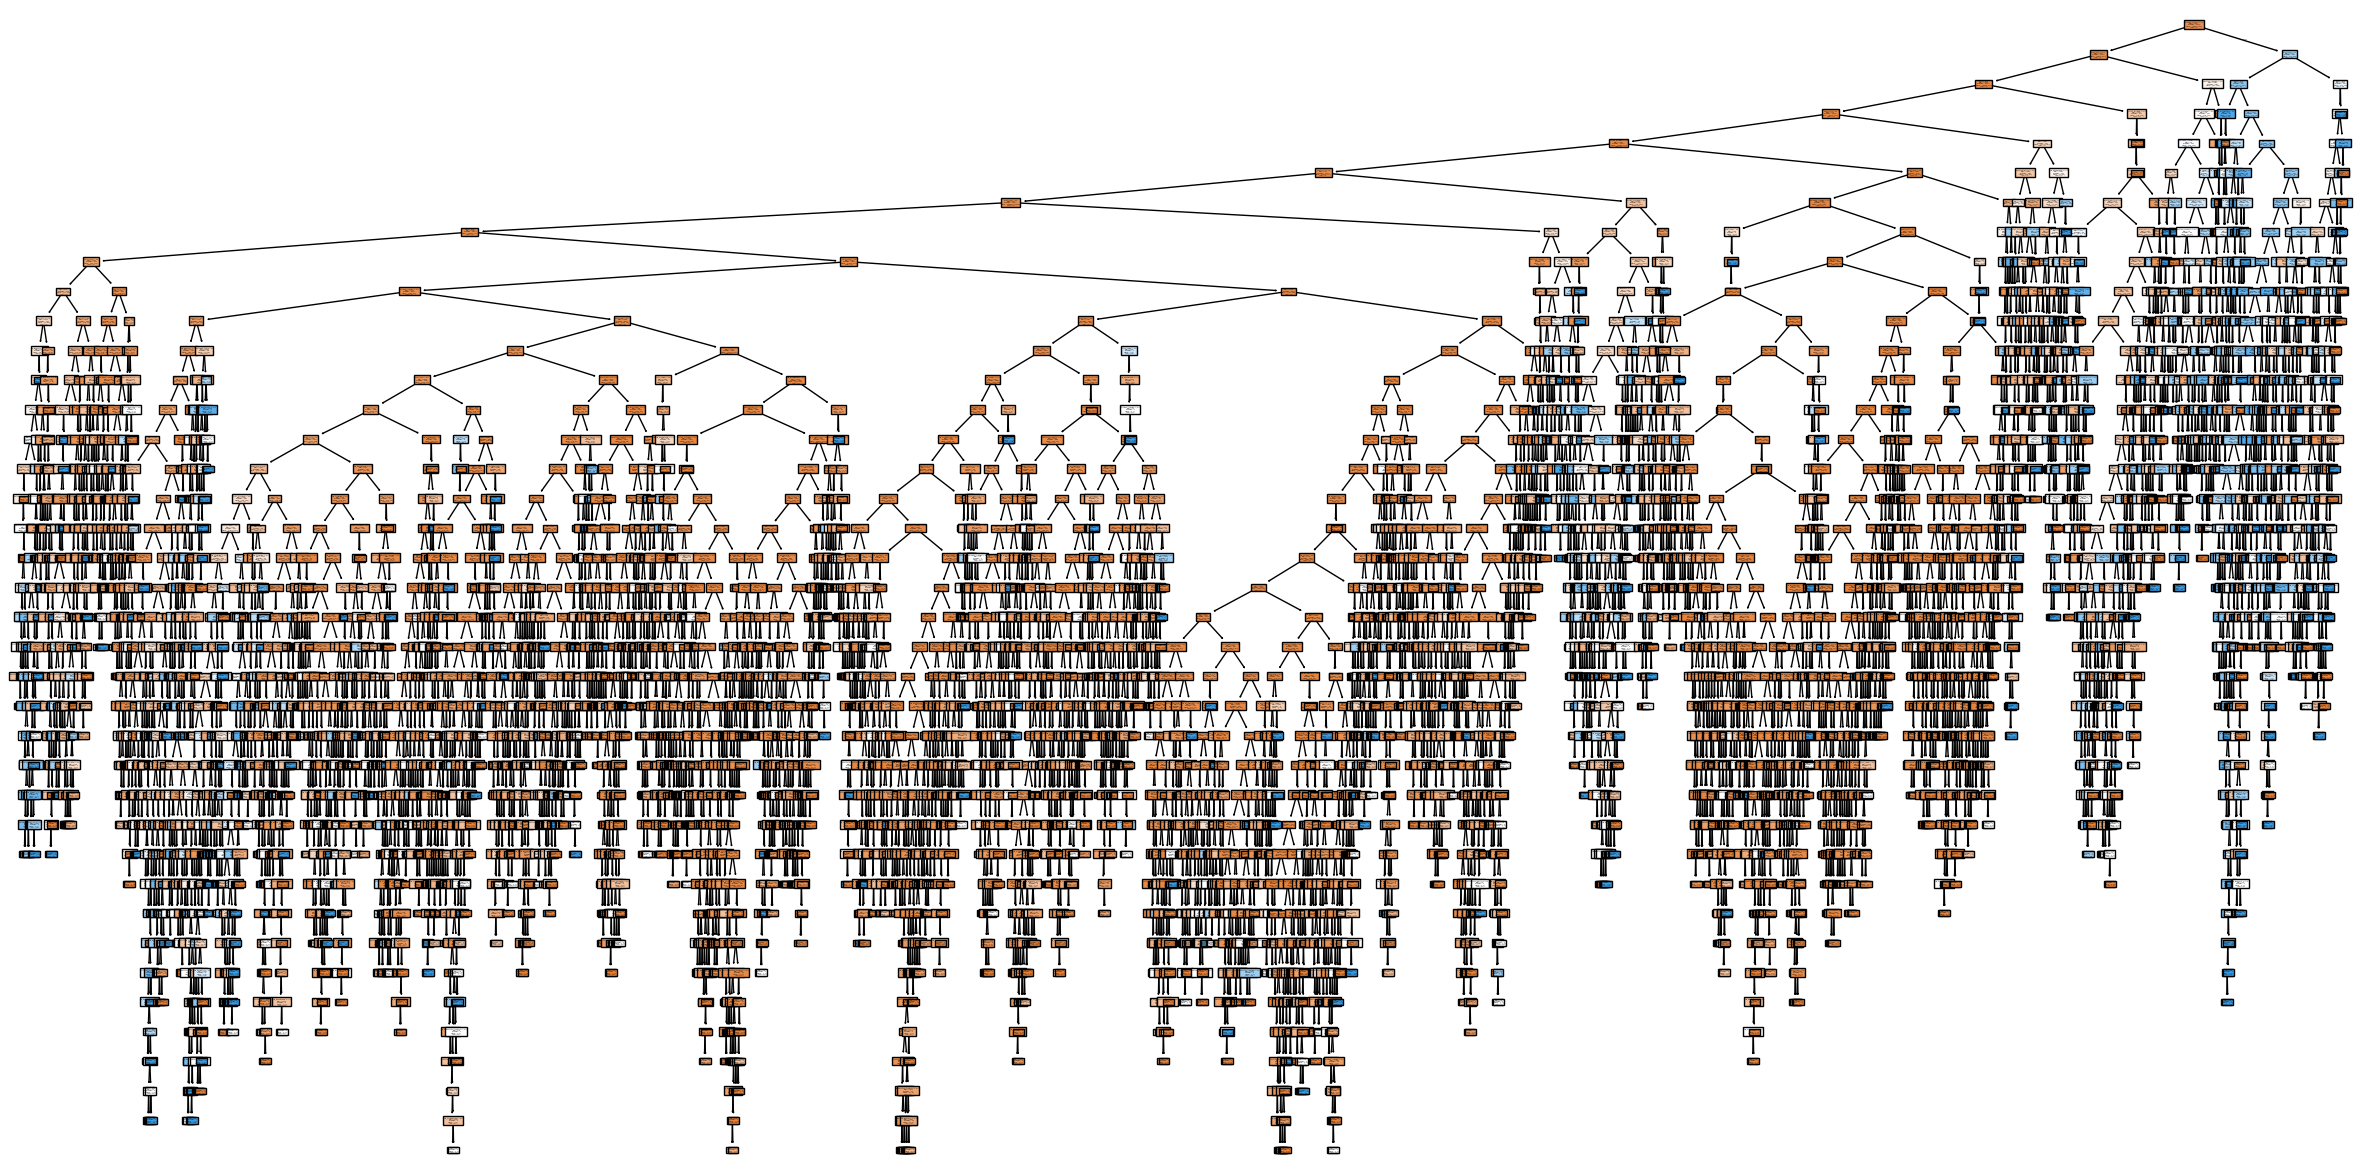

In [40]:
plt.figure(figsize=(30,15))
plot_tree(dtc, feature_names=x.columns, class_names=['No','Yes'], filled=True)
plt.show()

## `Final Conclusion`

- **High Accuracy :** The model provides high accuracy for training and testing, at around 86.87%

- **Class Imbalance :** The data is imbalanced. It has much more flase instances (7215) than true instances (827)

- **Performance :** 
  - The model identifies false instances with a high precision of 0.92 and recall of 0.94.
  - But the model struggles to find true instances, with a poor precision of 0.33 and recall of 0.26.

